In [ ]:
# !pip install openpyxl
# !pip install imbalanced-learn
# !pip3 install ipympl
# !pip install import-ipynb
# !pip install shapely
# !pip install SciencePlots 
# !pip install seaborn
# !pip install tqdm
# !pip install ipywidgets
# !pip install cubist


# pip install --upgrade cubist

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import seaborn as sns
import scienceplots
import os, sys
from numpy import nan
import re
import ipympl
# from IPython.core.display import display, HTML
import ipywidgets
import json
from os import listdir
import glob
import math
from IPython.display import Image, display, HTML
from shapely.geometry import mapping
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, RepeatedKFold, cross_val_predict
from sklearn.metrics import r2_score, mean_squared_error, precision_score, recall_score, mean_absolute_error, make_scorer
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, LeaveOneOut, cross_validate
#from sklearn.impute import SimpleImputer
from tqdm.notebook import tqdm
from sklearn.svm import SVC
from tqdm import tqdm
import pickle
from imblearn.over_sampling import SMOTE
from scipy.stats import ks_2samp
from scipy import stats
np.seterr(divide='ignore', invalid='ignore')
pd.options.display.max_columns = 100
from sklearn.preprocessing import PolynomialFeatures
%matplotlib inline
from matplotlib import pyplot
from scipy.signal import savgol_filter
from scipy.spatial import ConvexHull
from scipy.interpolate import interp1d


In [105]:
import import_ipynb
from SoilPrep import * 

In [106]:
df = pd.read_csv('uae.csv')
df.head(5)


,FID,Lon,Lat,TOC,clay,silt,sand,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,...,2451,2452,2453,2454,2455,2456,2457,2458,2459,2460,2461,2462,2463,2464,2465,2466,2467,2468,2469,2470,2471,2472,2473,2474,2475,2476,2477,2478,2479,2480,2481,2482,2483,2484,2485,2486,2487,2488,2489,2490,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
0,1,54.736553,24.236353,0.22,0,1.0,98.0,0.089311,0.101862,0.116344,0.117707,0.113324,0.113424,0.115095,0.110248,0.103506,0.105503,0.110169,0.112541,0.118426,0.115746,0.105909,0.107894,0.107123,0.109696,0.117092,0.117855,0.119902,0.121461,0.116911,0.112778,0.115075,0.119952,0.121716,0.123712,0.124466,0.123697,0.121629,0.121883,0.124804,0.122874,0.119764,0.123741,0.127166,0.126157,0.124842,0.123106,0.122967,0.125440,0.125761,...,0.505024,0.503972,0.503082,0.502225,0.500965,0.499482,0.498255,0.497150,0.495687,0.494069,0.492573,0.490743,0.489241,0.487959,0.486013,0.484152,0.482461,0.480586,0.478966,0.477298,0.475440,0.473770,0.471942,0.470410,0.469083,0.467510,0.466006,0.464431,0.462235,0.460467,0.459512,0.458457,0.457830,0.457056,0.455510,0.453568,0.451408,0.450124,0.449204,0.449205,0.448691,0.447846,0.446950,0.445301,0.444228,0.443859,0.443358,0.442132,0.440855,0.440254
1,2,54.712263,24.253125,0.23,0,0.0,100.0,0.071750,0.082479,0.097936,0.097098,0.090665,0.095351,0.098170,0.092902,0.085862,0.087585,0.090802,0.091751,0.100449,0.096611,0.084396,0.089818,0.089340,0.090029,0.096445,0.094647,0.095934,0.099914,0.094580,0.091928,0.096085,0.098593,0.098399,0.100215,0.103574,0.103900,0.101460,0.100196,0.101961,0.101015,0.099445,0.101963,0.103266,0.101319,0.100529,0.099800,0.100243,0.102263,0.101308,...,0.450318,0.448831,0.447116,0.445905,0.445075,0.443562,0.442045,0.440411,0.438146,0.436031,0.434178,0.431873,0.429721,0.427904,0.426066,0.424598,0.423261,0.421830,0.420088,0.417828,0.415412,0.412745,0.410257,0.408520,0.406483,0.404732,0.403398,0.401255,0.399124,0.397683,0.396048,0.394434,0.393051,0.390887,0.388737,0.387267,0.386171,0.385700,0.384558,0.383507,0.382384,0.380523,0.379745,0.379368,0.378552,0.378313,0.376914,0.375947,0.374874,0.374323
2,3,54.628437,24.201236,0.54,7,2.0,71.0,0.041403,0.053078,0.069837,0.072832,0.069875,0.074908,0.074440,0.068492,0.064969,0.060439,0.061995,0.069090,0.075366,0.072394,0.063782,0.066973,0.063572,0.064333,0.076012,0.074383,0.073874,0.076919,0.069139,0.067084,0.073654,0.077595,0.078171,0.078817,0.079354,0.078619,0.076882,0.076737,0.078894,0.078441,0.077030,0.078739,0.080757,0.080092,0.078368,0.077739,0.078954,0.081610,0.081029,...,0.254087,0.253243,0.252018,0.250617,0.249314,0.247589,0.246501,0.245682,0.244078,0.242976,0.241615,0.239750,0.238310,0.236734,0.235230,0.233702,0.232329,0.231019,0.229220,0.227910,0.226667,0.224981,0.223713,0.222331,0.220553,0.219432,0.218279,0.216748,0.215095,0.212785,0.210994,0.210149,0.209413,0.208985,0.208481,0.207685,0.206786,0.205675,0.205031,0.203774,0.202939,0.202970,0.201991,0.200577,0.199762,0.198509,0.197953,0.196985,0.196200,0.196456
3,4,54.637328,24.167353,0.06,0,1.0,74.0,0.127570,0.137622,0.152223,0.150098,0.142105,0.142880,0.146324,0.144206,0.141614,0.138125,0.138871,0.142214,0.146783,0.144006,0.135700,0.141869,0.140081,0.139891,0.145967,0.144568,0.146686,0.150084,0.145208,0.141791,0.146449,0.151923,0.151835,0.152822,0.155049,0.154900,0.152437,0.152329,0.154825,0.153069,0.150946,0.155493,0.159144,0.157156,0.154593,0.153615,0.155277,0.159256,0.158817,...,0.477536,0.476374,0.475360,0.474317,0.472941,0.471083,0.469237,0.467607,0.465895,0.464562,0.463261,0.461304,0.459077,0.456753,0.454284,0.452215,0.450451,0.448153,0.445981,0.443916,0.441472,0.439588,0.437714,0.435782,0.434151,0.432324,0.430425,0.428736,0.426160,0.423627,0.422163,0.420034,0.418287,0.417215,0.415542,0.414107,0.413113,0.412229,0.411363,0.410837,0.410158,0.409710,0.408636,0.406409,0.405014,0.403905,0.403292,0.403064,0.402813,0.401774
4,5,54.871967,24.

## Removal of noise by not selecting starting and end bands

In [107]:
spec1 = df.iloc[:,57:2108].copy()
spec1.head(5)

,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,...,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
0,0.132197,0.131488,0.132576,0.132722,0.132029,0.134659,0.135678,0.135074,0.135785,0.137270,0.138130,0.136568,0.137646,0.139148,0.139250,0.140026,0.140361,0.140902,0.142279,0.143269,0.144129,0.145348,0.146130,0.146498,0.147298,0.148430,0.149082,0.149506,0.150597,0.152064,0.153333,0.154457,0.155716,0.156826,0.157711,0.158354,0.159543,0.161235,0.162204,0.162983,0.163930,0.165430,0.167121,0.168589,0.169168,0.170028,0.170997,0.172139,0.173340,0.174260,...,0.553845,0.553308,0.552715,0.552262,0.551709,0.551014,0.550466,0.549654,0.548693,0.548122,0.547419,0.546803,0.546530,0.545801,0.544873,0.544079,0.543125,0.542145,0.541152,0.540185,0.539289,0.538305,0.537223,0.536029,0.534775,0.533649,0.532742,0.531715,0.530519,0.529449,0.528385,0.527379,0.526438,0.525538,0.524470,0.523266,0.522147,0.520700,0.519286,0.518121,0.516985,0.516036,0.515010,0.513881,0.512770,0.511402,0.510095,0.508928,0.507499,0.506154
1,0.108211,0.108199,0.109094,0.109304,0.109066,0.111004,0.111819,0.111446,0.111792,0.113418,0.114383,0.112376,0.113160,0.114710,0.115185,0.116067,0.116300,0.116528,0.117631,0.118530,0.119337,0.120351,0.121088,0.121666,0.122731,0.123601,0.124131,0.124624,0.125034,0.126265,0.127901,0.129405,0.130446,0.131069,0.131703,0.132317,0.133509,0.135197,0.136465,0.137250,0.137802,0.138892,0.140466,0.141969,0.142429,0.143151,0.144002,0.145012,0.146161,0.146988,...,0.504261,0.503778,0.503295,0.502756,0.502049,0.501413,0.500776,0.499971,0.499396,0.498757,0.498094,0.497683,0.497013,0.496031,0.495160,0.494134,0.492911,0.492027,0.491128,0.489963,0.488914,0.487840,0.486646,0.485485,0.484422,0.483240,0.481823,0.480533,0.479247,0.478024,0.476905,0.475752,0.474714,0.473333,0.471867,0.470726,0.469224,0.467688,0.466564,0.465216,0.463884,0.462804,0.461737,0.460651,0.459300,0.458020,0.456631,0.454874,0.453601,0.452144
2,0.087828,0.087517,0.087613,0.087666,0.088152,0.090908,0.091333,0.089935,0.090358,0.092582,0.094041,0.092037,0.092451,0.093886,0.094757,0.095708,0.095993,0.096216,0.097100,0.098248,0.099334,0.099950,0.100686,0.101406,0.102367,0.103358,0.103797,0.103920,0.104431,0.105775,0.107477,0.109034,0.110285,0.111141,0.111802,0.112305,0.113300,0.114846,0.116296,0.117075,0.117460,0.118880,0.120696,0.122197,0.122474,0.123220,0.124188,0.125188,0.126318,0.127030,...,0.306349,0.305574,0.304779,0.304093,0.303291,0.302305,0.301416,0.300412,0.299417,0.298638,0.297758,0.296850,0.296120,0.295239,0.294198,0.293308,0.292365,0.291440,0.290649,0.289555,0.288282,0.286841,0.285386,0.284332,0.283407,0.282481,0.281426,0.280206,0.278896,0.277767,0.276756,0.275625,0.274746,0.273805,0.272690,0.271665,0.270596,0.269414,0.268186,0.266977,0.265609,0.264296,0.263194,0.262063,0.260920,0.259700,0.258399,0.257115,0.255891,0.254916
3,0.164899,0.165540,0.166436,0.166390,0.166166,0.168653,0.169344,0.168497,0.169351,0.171091,0.172429,0.171382,0.172321,0.173848,0.174389,0.175071,0.175229,0.175822,0.177251,0.178497,0.179577,0.180602,0.181626,0.182307,0.183246,0.184355,0.185130,0.185911,0.187020,0.188538,0.189985,0.191576,0.193083,0.194172,0.194997,0.196203,0.197665,0.198978,0.200762,0.202125,0.202995,0.204386,0.206127,0.207846,0.208737,0.209706,0.210652,0.211885,0.213440,0.214459,...,0.530152,0.529644,0.528968,0.528384,0.527843,0.527236,0.526813,0.526146,0.525249,0.524549,0.523706,0.523134,0.522848,0.522130,0.521406,0.520417,0.519197,0.518220,0.517079,0.516214,0.515437,0.514247,0.513102,0.511791,0.510344,0.509186,0.508097,0.506785,0.505418,0.504128,0.502665,0.501399,0.500381,0.499255,0.498308,0.497345,0.496185,0.494824,0.493243,0.491827,0.490462,0.

In [108]:
c_min = 0
c_max = 2050

## Smoothing using Savitzky Golay filter

In [109]:
alldata_smoothed = pd.DataFrame(savgol_filter(spec1, 55, 2, axis=1), columns=spec1.columns,
                                index=spec1.index)
alldata_smoothed.head(5)

,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,...,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
0,0.131151,0.131666,0.132197,0.132743,0.133304,0.133881,0.134473,0.135081,0.135703,0.136342,0.136995,0.137664,0.138348,0.139048,0.139763,0.140493,0.141238,0.141999,0.142776,0.143567,0.144374,0.145196,0.146034,0.146887,0.147755,0.148639,0.149538,0.150453,0.151450,0.152442,0.153451,0.154478,0.155497,0.156584,0.157700,0.158794,0.159893,0.161021,0.162173,0.163278,0.164382,0.165504,0.166612,0.167720,0.168800,0.169860,0.170937,0.172024,0.173103,0.174170,...,0.553801,0.553261,0.552703,0.552125,0.551524,0.550897,0.550246,0.549578,0.548895,0.548195,0.547484,0.546757,0.546008,0.545233,0.544426,0.543591,0.542727,0.541834,0.540923,0.539997,0.539053,0.538097,0.537127,0.536174,0.535205,0.534220,0.533218,0.532199,0.531164,0.530112,0.529044,0.527959,0.526858,0.525740,0.524605,0.523455,0.522287,0.521103,0.519903,0.518686,0.517452,0.516202,0.514936,0.513653,0.512353,0.511037,0.509704,0.508355,0.506990,0.505607
1,0.107676,0.108152,0.108642,0.109146,0.109663,0.110194,0.110739,0.111297,0.111869,0.112454,0.113054,0.113666,0.114293,0.114933,0.115587,0.116254,0.116935,0.117629,0.118338,0.119060,0.119795,0.120544,0.121307,0.122083,0.122873,0.123677,0.124494,0.125325,0.126224,0.127135,0.128058,0.129000,0.129945,0.130941,0.131957,0.132954,0.133948,0.134980,0.136035,0.137026,0.138008,0.139007,0.140000,0.140999,0.141973,0.142920,0.143873,0.144834,0.145789,0.146731,...,0.504547,0.504012,0.503451,0.502856,0.502230,0.501574,0.500895,0.500198,0.499474,0.498732,0.497969,0.497173,0.496349,0.495493,0.494603,0.493681,0.492727,0.491751,0.490749,0.489725,0.488691,0.487629,0.486547,0.485498,0.484428,0.483339,0.482229,0.481099,0.479949,0.478779,0.477589,0.476378,0.475148,0.473897,0.472627,0.471336,0.470025,0.468694,0.467343,0.465972,0.464580,0.463169,0.461737,0.460285,0.458814,0.457322,0.455810,0.454277,0.452725,0.451153
2,0.086704,0.087210,0.087730,0.088262,0.088808,0.089368,0.089940,0.090526,0.091125,0.091738,0.092364,0.093003,0.093655,0.094321,0.095000,0.095692,0.096398,0.097117,0.097849,0.098594,0.099353,0.100125,0.100911,0.101709,0.102521,0.103346,0.104185,0.105037,0.105974,0.106919,0.107850,0.108795,0.109767,0.110810,0.111862,0.112861,0.113853,0.114900,0.115983,0.116998,0.117990,0.118996,0.120007,0.121024,0.122010,0.122967,0.123926,0.124895,0.125860,0.126796,...,0.306741,0.305896,0.305041,0.304167,0.303283,0.302386,0.301480,0.300567,0.299647,0.298715,0.297774,0.296828,0.295875,0.294920,0.293959,0.292986,0.292002,0.291008,0.290001,0.288983,0.287956,0.286915,0.285856,0.284812,0.283759,0.282697,0.281626,0.280546,0.279457,0.278359,0.277253,0.276137,0.275012,0.273877,0.272734,0.271582,0.270421,0.269251,0.268072,0.266884,0.265687,0.264480,0.263265,0.262041,0.260808,0.259565,0.258314,0.257054,0.255784,0.254506
3,0.164352,0.164970,0.165606,0.166258,0.166928,0.167613,0.168316,0.169036,0.169772,0.170525,0.171295,0.172081,0.172885,0.173705,0.174542,0.175396,0.176266,0.177154,0.178058,0.178978,0.179916,0.180871,0.181842,0.182830,0.183834,0.184856,0.185894,0.186949,0.188097,0.189275,0.190470,0.191675,0.192883,0.194152,0.195438,0.196689,0.197945,0.199228,0.200539,0.201811,0.203072,0.204345,0.205607,0.206855,0.208064,0.209245,0.210432,0.211616,0.212783,0.213925,...,0.530448,0.529905,0.529341,0.528758,0.528150,0.527508,0.526840,0.526137,0.525400,0.524641,0.523858,0.523063,0.522254,0.521422,0.520569,0.519690,0.518780,0.517837,0.516856,0.515839,0.514797,0.513740,0.512665,0.511627,0.510569,0.509491,0.508393,0.507275,0.506138,0.504980,0.503802,0.502604,0.501386,0.500148,0.498890,0.497612,0.496314,0.494996,0.493659,0.492301,0.490923,0.

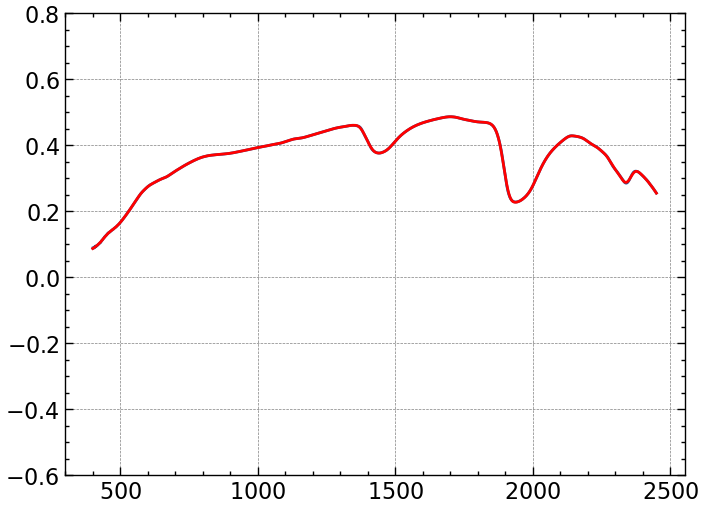

In [110]:
x2 = alldata_smoothed.iloc[2,:]
specy = spec1.iloc[2,:]
specx =  np.arange(start = 400, stop = 2451, step = 1)

fig = plt.figure()
ax = fig.subplots()
p = ax.plot(specx, specy)
p = ax.plot(specx, x2, 'r')
plt.ylim([-0.6, 0.8])
plt.show()

## Transformation using log(1/R)

In [111]:
#spec1 = df.iloc[:,57:2108].copy()
log_spec = ((1/alldata_smoothed).apply(np.log)).copy()
log_spec.head(5)

,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,...,2401,2402,2403,2404,2405,2406,2407,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422,2423,2424,2425,2426,2427,2428,2429,2430,2431,2432,2433,2434,2435,2436,2437,2438,2439,2440,2441,2442,2443,2444,2445,2446,2447,2448,2449,2450
0,2.031408,2.027487,2.023464,2.019342,2.015121,2.010804,2.006391,2.001884,1.997284,1.992592,1.987810,1.982940,1.977982,1.972939,1.967811,1.962599,1.957306,1.951933,1.946481,1.940952,1.935347,1.929668,1.923915,1.918091,1.912196,1.906233,1.900203,1.894107,1.887500,1.880971,1.874375,1.867705,1.861127,1.854165,1.847059,1.840147,1.833251,1.826220,1.819093,1.812299,1.805561,1.798761,1.792086,1.785460,1.779040,1.772784,1.766463,1.760120,1.753867,1.747721,...,0.590950,0.591926,0.592935,0.593981,0.595070,0.596207,0.597389,0.598604,0.599849,0.601125,0.602421,0.603750,0.605122,0.606543,0.608024,0.609559,0.611149,0.612796,0.614479,0.616192,0.617941,0.619716,0.621521,0.623296,0.625105,0.626948,0.628826,0.630738,0.632685,0.634667,0.636684,0.638737,0.640825,0.642949,0.645109,0.647305,0.649538,0.651807,0.654113,0.656457,0.658838,0.661257,0.663713,0.666208,0.668741,0.671313,0.673924,0.676575,0.679265,0.681995
1,2.228630,2.224215,2.219695,2.215069,2.210341,2.205511,2.200581,2.195552,2.190427,2.185207,2.179894,2.174488,2.168992,2.163408,2.157736,2.151979,2.146139,2.140216,2.134213,2.128132,2.121973,2.115739,2.109431,2.103051,2.096600,2.090081,2.083494,2.076841,2.069694,2.062508,2.055269,2.047946,2.040642,2.033012,2.025282,2.017750,2.010300,2.002631,1.994842,1.987584,1.980443,1.973234,1.966116,1.959005,1.952120,1.945473,1.938826,1.932167,1.925595,1.919156,...,0.684094,0.685155,0.686269,0.687451,0.688696,0.690005,0.691359,0.692752,0.694200,0.695687,0.697217,0.698817,0.700477,0.702202,0.703999,0.705866,0.707800,0.709783,0.711823,0.713911,0.716025,0.718200,0.720421,0.722580,0.724786,0.727038,0.729336,0.731682,0.734075,0.736516,0.739005,0.741543,0.744129,0.746765,0.749449,0.752184,0.754969,0.757805,0.760692,0.763631,0.766621,0.769664,0.772760,0.775909,0.779111,0.782368,0.785680,0.789047,0.792470,0.795950
2,2.445252,2.439432,2.433494,2.427440,2.421273,2.414995,2.408608,2.402115,2.395518,2.388819,2.382021,2.375125,2.368135,2.361052,2.353879,2.346619,2.339272,2.331843,2.324332,2.316742,2.309075,2.301335,2.293521,2.285638,2.277686,2.269669,2.261587,2.253444,2.244561,2.235680,2.227016,2.218292,2.209397,2.199936,2.190492,2.181598,2.172846,2.163695,2.154308,2.145594,2.137151,2.128669,2.120205,2.111770,2.103650,2.095839,2.088068,2.080278,2.072585,2.065177,...,1.181751,1.184509,1.187310,1.190178,1.193088,1.196050,1.199051,1.202083,1.205152,1.208266,1.211420,1.214604,1.217818,1.221050,1.224316,1.227631,1.230994,1.234406,1.237872,1.241386,1.244947,1.248569,1.252268,1.255926,1.259630,1.263379,1.267174,1.271016,1.274905,1.278842,1.282827,1.286860,1.290942,1.295074,1.299257,1.303490,1.307774,1.312111,1.316500,1.320942,1.325438,1.329988,1.334593,1.339254,1.343972,1.348746,1.353579,1.358470,1.363420,1.368430
3,1.805747,1.801989,1.798144,1.794212,1.790195,1.786095,1.781911,1.777645,1.773299,1.768873,1.764369,1.759787,1.755130,1.750397,1.745590,1.740711,1.735760,1.730739,1.725648,1.720490,1.715265,1.709974,1.704619,1.699200,1.693720,1.688178,1.682577,1.676917,1.670795,1.664555,1.658263,1.651952,1.645672,1.639114,1.632514,1.626132,1.619768,1.613303,1.606744,1.600425,1.594195,1.587947,1.581788,1.575736,1.569908,1.564248,1.558595,1.552983,1.547481,1.542132,...,0.634034,0.635057,0.636123,0.637224,0.638375,0.639592,0.640858,0.642194,0.643594,0.645042,0.646534,0.648053,0.649601,0.651195,0.652832,0.654522,0.656276,0.658094,0.659992,0.661961,0.663982,0.666039,0.668133,0.670160,0.672229,0.674343,0.676500,0.678701,0.680947,0.683237,0.685572,0.687953,0.690379,0.692851,0.695369,0.697934,0.700546,0.703205,0.705911,0.708666,0.711469,0.

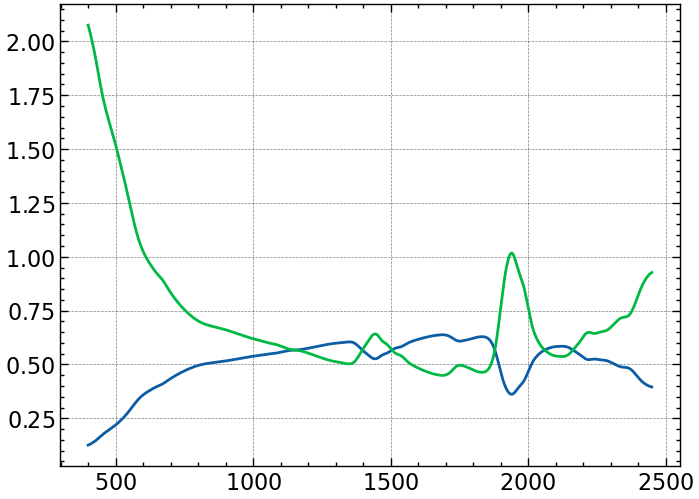

In [112]:
log1_spec = log_spec.iloc[100,:]
ordinary_spec = alldata_smoothed.iloc[100,:]
x = np.arange(start = 400, stop = 2451, step = 1)
fig = plt.figure()
ax = fig.subplots()
p = ax.plot(x,ordinary_spec)
p = ax.plot(x,log1_spec)
plt.show()

## Transformation using 1st order derivative

In [113]:
def first_derivative(alldata_smoothed):
    fo_der = alldata_smoothed.iloc[:,:].copy()
    (row,col) = fo_der.shape
    
    for i in range(0,col):
        
        if i==col-1:
            fo_der.iloc[:,i] = fo_der.iloc[:,i-1]
        else:    
            fo_der.iloc[:,i] = (alldata_smoothed.iloc[:,i+1]- alldata_smoothed.iloc[:,i])
        
    fo_der = 100*fo_der
    return(fo_der.copy())

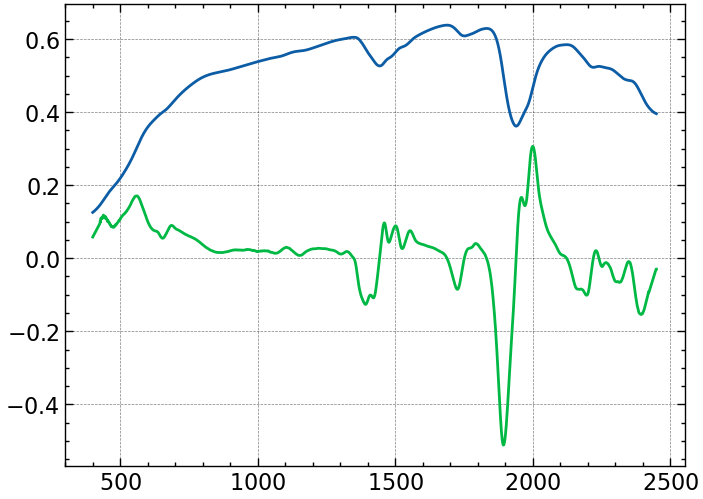

In [114]:
ordinary_spec = alldata_smoothed.iloc[100,:]
fo_der = first_derivative(alldata_smoothed)
x = np.arange(start = 400, stop = 2451, step = 1)
fig = plt.figure()
ax = fig.subplots()
p = ax.plot(x,alldata_smoothed.iloc[100,:])
p = ax.plot(x,fo_der.iloc[100,:])
plt.show()

## Creating ipywidgets for spectra and corresponding first order derivative

In [115]:
def plot_der (sample):
    x = fo_der.iloc[sample,:]
    x.plot()
    y = spec1.iloc[sample,:]
    y.plot()
    plt.ylim([-0.6, 0.8])

ipywidgets.interact(plot_der, sample = (0, 293,1))

# def plot_der (target, mean_of_std):
#     i = target_names.index(target)
#     r_val[i].iloc[0,:].plot(color = clr[i])
#     spec_std.plot(color = 'blue')
#     if mean_of_std == 'on':
#         mean_spec_std.plot(color = 'blue', linewidth=1, linestyle='dashed')
#     plt.ylim([-0.6, 0.6])

# ipywidgets.interact(plot_corr, target = target_names, mean_of_std= ['on', 'off'])

interactive(children=(IntSlider(value=146, description='sample', max=293), Output()), _dom_classes=('widget-in…

<function __main__.plot_der(sample)>

## Transformation using Continuum Removal

In [147]:
# x1=alldata_smoothed.iloc[:,:1]   # selecting all rows and the first column
# a1=np.array(x1)

# y1=alldata_smoothed.iloc[:,1:]   # selecting all the rows and all the columns except the first column
# b1=np.array(y1)

# points=np.concatenate((a1,b1), axis=1)

# alldata_smoothed.shape
# alldata_smoothed

(2051, 294)

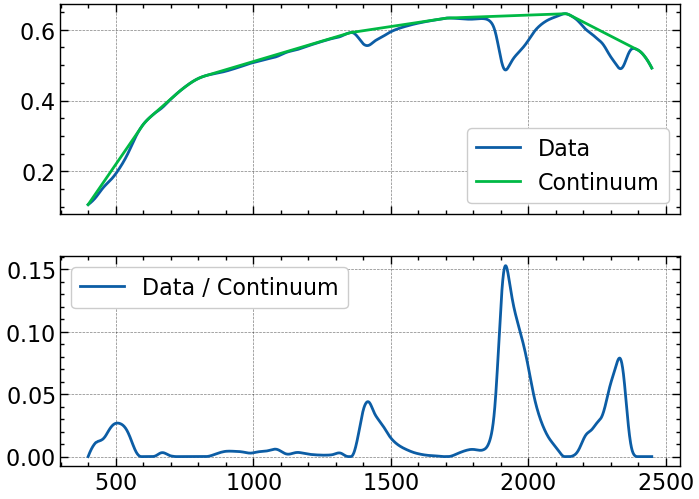

In [165]:
def continuum_removal(points, show=False):
    x1, y1 = points.T
    augmented = np.concatenate([points, [(x1[0], np.min(y1)-1), (x1[-1], np.min(y1)-1)]], axis=0)
    hull = ConvexHull(augmented)
    continuum_points = points[np.sort([v for v in hull.vertices if v < len(points)])]
    continuum_function = interp1d(*continuum_points.T)
    yprime = continuum_function(x1) - y1
    #yprime = y1 / continuum_function(x1)

    if show:
        fig, axes = plt.subplots(2, 1, sharex=True)
        axes[0].plot(x1, y1, label='Data')
        axes[0].plot(*continuum_points.T, label='Continuum')
        axes[0].legend()
        axes[1].plot(x1, yprime, label='Data / Continuum')
        axes[1].legend()

    return np.c_[x1, yprime]

x1 = np.linspace(400, 2450, 2051)
y1 = alldata_smoothed.iloc[200,:]
type(y1)
points = np.c_[x1, y1]
# y1 = np.random.randn(len(x1))
# points = np.c_[x1, y1]
# # x1 = pd.DataFrame(alldata_smoothed).to_numpy()
# # y1 = np.random.randn(len(x1))
# # points = np.c_[x1, y1]
new_points = continuum_removal(points, show=True)

# plt.show()

In [117]:
# class continuum_removal:
#     """
#     Spectra vector:
#         should be MxN matrix where M is the number of samples and N is the number of features.
    
#     WL_vector:
#         is the wavelength vector. flattened array, N number of elements.
    
#     feature_regions:
#         regions where user is interested in applying the continuum removal to.
        
    
#     The output is a continuum removed vector based on number of samples and 
#     regions.
#     """

#     def __init__(self,spectra,wl_vector,feature_regions):
#         self.spectra = spectra

#         if len(wl_vector)!=1:
#             self.wl = np.squeeze(wl_vector)
#         else:
#             self.wl = wl_vector
       
#         for i in feature_regions:
#             if type(i) is not np.ndarray and type(i) is not tuple:
#                 raise Exception("Each wavelength region should either be an array or a tuple(start,end)")
#             else:
#                 self.feature_regions = feature_regions                  
#     # this function find the nearest wavelength values to a given wavelength
#     # region or wavelength end estimates values 
#     def find_near(self,wl_region):
#         """
#         this function find the nearest wavelength values to a given wavelength
#         region or wavelength end estimates values 

#         """
#         if isinstance(wl_region, tuple) or type(wl_region) is np.ndarray:
#             LL = self.wl[np.argsort(np.abs(wl_region[0]-self.wl))[0]]
#             UL = self.wl[np.argsort(np.abs(wl_region[-1]-self.wl))[0]]
#             return self.wl[np.where(self.wl==LL)[0][0]:np.where(self.wl==UL)[0][0]+1]
#         elif isinstance(wl_region, int) or isinstance(wl_region, float):
#             point = self.wl[np.argsort(np.abs(wl_region-self.wl))[0]]
#             return self.wl[np.where(self.wl==point)[0][0]]
#         else:
#             raise Exception("Entered feature region should either be a list of length-two tuples (start,end) or a list of arrays.")
        
#     # this function will give out reflectance value of each spectra, given a 
#     # wavelength region or wavelength end estimates values     
#     def R_value(self,spectra,wl_region):     
#         """
#         This function finds the reflectance value, given a wavelegnth region 
#         and spectra        
#         """
#         if isinstance(wl_region, tuple) or type(wl_region) is np.ndarray:
#             axis=self.find_near(wl_region)
#             LL_index = np.where(self.wl==axis[0])[0][0] #lower level index of spectra
#             UL_index = np.where(self.wl==axis[-1])[0][0] #upper level index of spectra
#             return spectra[LL_index:UL_index+1]    
#         # or if given just one value 
#         elif isinstance(wl_region, int) or isinstance(wl_region, float): 
#             axis= self.find_near(wl_region)
#             index= np.where(self.wl==axis)[0][0]
#             return spectra[index]

#         else:
#             raise Exception("Entered feature region should either be a list of length-two tuples (start,end) or a list of arrays.")
        
        
#     def slope_intercept(self,spectra,wl_region):
#         """ 
#         this function finds the slope and the intercept of a linear fit over
#         the selected regions
#         """
#         x1 = self.find_near(wl_region)[0]  
#         y1 = self.R_value(spectra,x1)
#         x2 = self.find_near(wl_region)[-1]
#         y2 = self.R_value(spectra,x2)
#         slope = (y2-y1)/(x2-x1)
#         intercept = y2 - slope*x2
#         return slope,intercept
    
#     # obtaining the continuum removed line from the given spectra
#     def cont_rem(self):
#         """
#         This function calculates the continuum removed spectra by dividing the 
#         fit lines by the original spectra
#         """
#         self.curve = []
#         if len(self.spectra) > 1:
#             for j in self.spectra:
#                 spectrum_curve=[]
#                 for region in self.feature_regions:
#                    s,i =self.slope_intercept(j,region)
#                    spectrum_curve.append(self.R_value(j,region)/(self.find_near(region)*s+i))
#                 self.curve.append(spectrum_curve)
#         else:
#             for region in self.feature_regions:
#                s,i =self.slope_intercept(self.spectra,region)
#                self.curve.append(self.R_value(self.spectra,region)/(self.find_near(region)*s+i))
            
#         return self.curve
    
#     def plot_spectra(self):
#         """
#         this function simply plots the original spectras
#         """
#         fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,8))
#         ax.plot(self.wl,self.spectra.T)
#         ax.set_xlabel(r"Wavelength $(nm)$")
#         ax.set_ylabel(r"Reflectance")
#         ax.set_title("Spectra")
#         ax.set_xlim(self.wl[0],self.wl[-1])
#         ax.grid(True)
#         return ax
        
#     def plot_cr(self):
#         """
#         this function plots the continuum removed line of all spectra
#         """
#         fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(12,8))
#         count = 0
#         for i in self.curve:
#             color = np.random.rand(3,)
#             for j in i:
#                 ax.plot(self.find_near(self.feature_regions[count]),j,c=color)
#                 count += 1
#                 if count == len(i):
#                     count = 0                
#         ax.set_xlabel(r"Wavelength $(nm)$")
#         ax.set_ylabel(r"Reflectance")
#         ax.set_title("Continuum Removed Spectra")
#         ax.set_xlim(self.wl[0],self.wl[-1])
#         ax.grid(True)
#         return ax

# Step 1: Preprocessing (Normalisation and Smoothing)

In [118]:
# Colour scheme definition
kado = '#8B7355'
mati = '#A52A2A'
balu = '#F4A460'


df = pd.read_csv('uae.csv')

# ------------- Target Isolation ----------------------
target_names = ['sand', 'silt', 'clay', 'TOC']
clr = ['#F4A460', '#8B7355', '#A52A2A', 'green']
def isolate_targets(df, target_names):
    T=[]
    for i in range (0,len(target_names)):
        T.append(df[target_names[i]])
    return(T)
    
T = isolate_targets(df,target_names) 

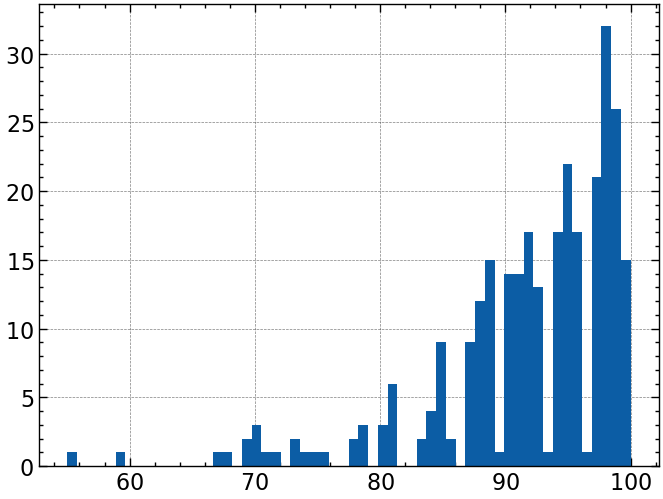

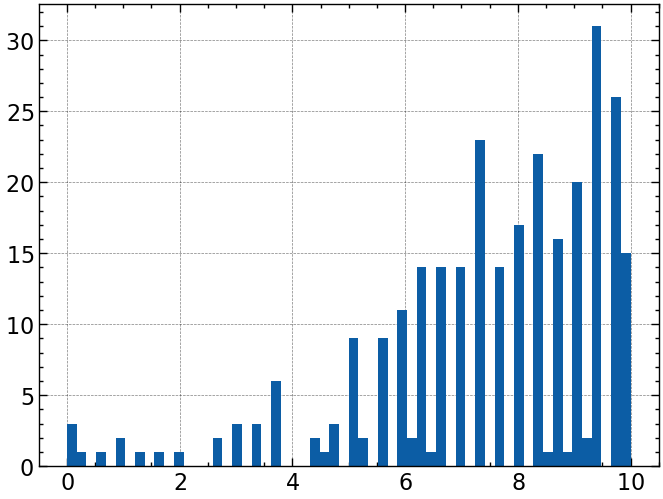

In [121]:
# --- TODO : Also define and Use other normalisation methods ----
def minmaxnormalize_targets(T):          
    NT =[]
    for i in range(0, len(T)):
        NT.append(lognormal(T[i].copy()))
    return(NT)

NT = minmaxnormalize_targets(T)


#udf = pd.read_csv('uae.csv')

plt.hist(T[0], bins=58)
plt.show()
plt.hist(NT[0], bins=58)
plt.show()


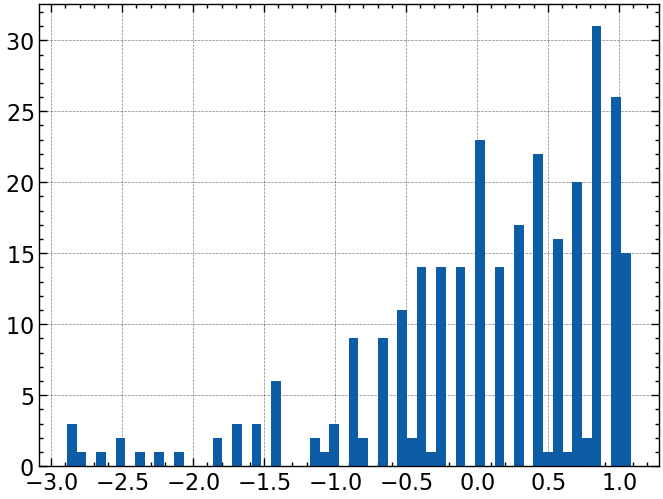

In [122]:
def zscorenormalize_targets(T):          
    ZT =[]
    for i in range(0, len(T)):
        ZT.append(z_score(T[i].copy()))
    return(ZT)

ZT = zscorenormalize_targets(T)


#Y = zscorenormalize_targets (udf['TOC'].copy())
plt.hist(ZT[0], bins=58)
plt.show()
# plt.hist(Y, bins=98)
# plt.show()

## Resampled Spectra

In [124]:
def resample_spectra (alldata_smoothed, n_band):
    #row, width = alldata_smoothed.shape
    w = (c_max-c_min)/n_band
    indx = []
    for i in range (0,n_band,1):
        indx.append(np.floor((i+0.5)*w))
    #print(indx)    
    #red_spectra = alldata_smoothed.iloc[:,0:n_band].copy()
    red_spectra = alldata_smoothed.iloc[:, indx].copy()
    
#     for i in range (0, n_band):
#         red_spectra.iloc[:,i] = alldata_smoothed.iloc[:,i*w:(i+1)*w].mean(axis=1)
        
    return (red_spectra)

red_spec = resample_spectra(alldata_smoothed,50)
red_spec.head(100)
     

,420,461,502,543,584,625,666,707,748,789,830,871,912,953,994,1035,1076,1117,1158,1199,1240,1281,1322,1363,1404,1445,1486,1527,1568,1609,1650,1691,1732,1773,1814,1855,1896,1937,1978,2019,2060,2101,2142,2183,2224,2265,2306,2347,2388,2429
0,0.144374,0.185687,0.221656,0.273923,0.338969,0.377974,0.404371,0.438007,0.466263,0.487895,0.500660,0.507442,0.515016,0.524808,0.535368,0.544005,0.552011,0.564051,0.572356,0.582839,0.592263,0.600642,0.607572,0.614172,0.577205,0.586650,0.606466,0.623111,0.633043,0.640282,0.646077,0.651701,0.652332,0.648598,0.648319,0.644733,0.542663,0.505376,0.548344,0.598826,0.634238,0.651995,0.661842,0.641935,0.610660,0.588334,0.542671,0.524606,0.559519,0.531164
1,0.119795,0.156889,0.189705,0.237129,0.288653,0.322425,0.348043,0.379528,0.407581,0.429876,0.443222,0.450377,0.457891,0.467403,0.477588,0.485811,0.493415,0.505495,0.514307,0.525058,0.535220,0.544505,0.552560,0.560652,0.529704,0.538929,0.555748,0.571019,0.580852,0.588284,0.593968,0.599051,0.599414,0.596831,0.597101,0.593449,0.508934,0.466722,0.501612,0.547993,0.580840,0.596543,0.603793,0.583928,0.555044,0.526951,0.475687,0.454712,0.509502,0.479949
2,0.099353,0.136554,0.167527,0.214494,0.261664,0.287184,0.303166,0.324788,0.344798,0.360933,0.369375,0.372572,0.377118,0.383946,0.391597,0.398200,0.404710,0.415214,0.421688,0.430832,0.441193,0.450992,0.457325,0.458447,0.404776,0.376227,0.397995,0.433938,0.456553,0.470067,0.479245,0.485652,0.482197,0.474420,0.469722,0.458944,0.329134,0.226962,0.247589,0.310585,0.372526,0.408259,0.428165,0.420591,0.398591,0.370685,0.320022,0.290845,0.316654,0.279457
3,0.179916,0.225562,0.261104,0.316738,0.375467,0.404853,0.421562,0.445351,0.465619,0.480816,0.487707,0.489336,0.492799,0.499479,0.507539,0.513894,0.519972,0.531376,0.539264,0.549445,0.558806,0.567454,0.574906,0.582593,0.548377,0.557738,0.577367,0.594136,0.604378,0.612181,0.618620,0.625241,0.626332,0.622785,0.622639,0.618394,0.524467,0.484076,0.523214,0.575757,0.613936,0.630523,0.638909,0.618532,0.585864,0.559117,0.506404,0.482412,0.535809,0.506138
4,0.057511,0.075727,0.095531,0.120577,0.151652,0.180815,0.206625,0.253385,0.300996,0.345657,0.385025,0.417977,0.446366,0.471507,0.493603,0.511825,0.527647,0.545700,0.555875,0.568456,0.584750,0.598522,0.607876,0.609905,0.552791,0.527175,0.546406,0.573797,0.592359,0.607699,0.614769,0.606440,0.595953,0.595244,0.599681,0.599389,0.445193,0.359745,0.412550,0.466475,0.480621,0.495278,0.500809,0.492325,0.482553,0.433751,0.404782,0.395049,0.405442,0.374153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.105823,0.147046,0.184557,0.243084,0.326021,0.373554,0.399596,0.428431,0.452281,0.470242,0.479708,0.483977,0.490233,0.499501,0.509610,0.517302,0.524339,0.535420,0.543285,0.553206,0.562444,0.571369,0.579121,0.587812,0.559730,0.573563,0.591221,0.603740,0.612212,0.619007,0.625246,0.632272,0.635151,0.633484,0.635747,0.635763,0.561191,0.539733,0.578071,0.618106,0.646128,0.660572,0.669621,0.642104,0.608561,0.601955,0.578997,0.562284,0.584804,0.565135
96,0.123805,0.165193,0.202781,0.255560,0.321871,0.363585,0.391841,0.424671,0.452469,0.474591,0.488028,0.495353,0.503281,0.513087,0.523179,0.530458,0.536832,0.547511,0.554590,0.564030,0.573645,0.582702,0.590425,0.598314,0.566937,0.572003,0.591531,0.607309,0.618531,0.627271,0.634258,0.639916,0.638197,0.635310,0.638514,0.637920,0.544275,0.487217,0.535080,0.596337,0.627836,0.642570,0.649312,0.623383,0.593698,0.584565,0.559681,0.546498,0.556346,0.524396
97,0.125341,0.166664,0.203020,0.254307,0.316079,0.353058,0.377867,0.408067,0.434271,0.455428,0.468088,0.474574,0.481743,0.491012,0.500611,0.507776,0.514372,0.525412,0.533204,0.543319,0.553491,0.563316,0.571808,0.580913,0.552821,0.560096,0.579041,0.594035,0.604649,0.613053,0.620010,0.626354,0.626158,0.623699,0.626732,0.626771,0.540811,0.492959,0.537626,0.593696,0.624185,0.638459,0.645429,0.61

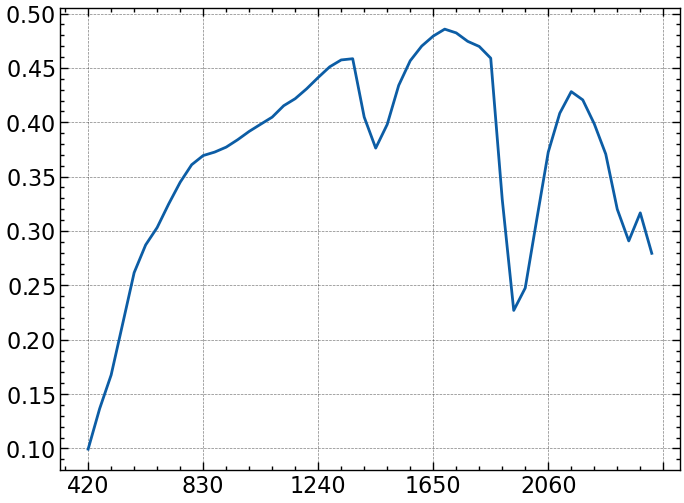

<Axes: >

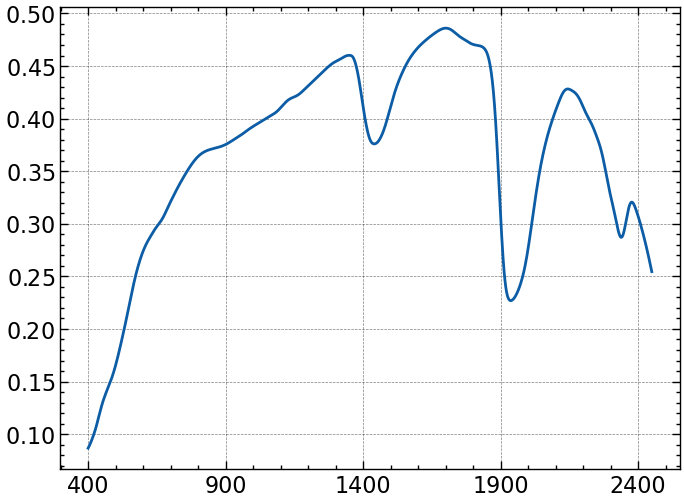

In [125]:
x2 =red_spec.iloc[2,:]
specy = alldata_smoothed.iloc[2,:]
#specx =  np.arange(start = 400, stop = 2451, step = 1)

x2.plot()
# fig = plt.figure()
# ax = fig.subplots()
# p = ax.plot(specx, specy)
# p = ax.plot(specx, x2, 'r')
#plt.ylim([-0.6, 0.8])
plt.show()

specy.plot()

In [126]:
plt.style.use(['science','notebook','grid'])
# Pearson corelation between different wavelengths and Targets/Outputs (i.e, sand, clay, silt, and TOC) 

def find_rpval (alldata_smoothed, T):
    r_val = []
    p_val = []
    for i in range (0,len(T)):
        p_val.append(alldata_smoothed.loc[[0],:].copy())
        r_val.append(alldata_smoothed.loc[[0],:].copy())
        for j in range(c_min, c_max+1):
            r_val[i].iloc[0,j], p_val[i].iloc[0,j] = stats.pearsonr(T[i], alldata_smoothed.iloc[:, j])
    return(r_val, p_val)

r_val, p_val = find_rpval (alldata_smoothed, T)

In [128]:
light_blue = '#6495ED'
spec_std = 6*alldata_smoothed.std()
mean_spec_std = spec_std.copy()
mean_spec_std.iloc[:] = spec_std.mean()

def plot_corr (target, mean_of_std):
    i = target_names.index(target)
    r_val[i].iloc[0,:].plot(color = clr[i])
    spec_std.plot(color = 'blue')
    if mean_of_std == 'on':
        mean_spec_std.plot(color = 'blue', linewidth=1, linestyle='dashed')
    plt.ylim([-0.6, 0.6])

ipywidgets.interact(plot_corr, target = target_names, mean_of_std= ['on', 'off'])

interactive(children=(Dropdown(description='target', options=('sand', 'silt', 'clay', 'TOC'), value='sand'), D…

<function __main__.plot_corr(target, mean_of_std)>

## Visualizing Smoothed Spectrum (variable window)

In [129]:
# ---- TODO: display the change in each target content (from previous) using little bars 
# ---- TODO: include continium removed spectra for better visualization ---
def smooth_spec (sample):
    x = fo_der.iloc[sample,:]
    x.plot()
    y = spec1.iloc[sample,:]
    y.plot()
    plt.ylim([-0.6, 0.8])

ipywidgets.interact(plot_der, sample = (0, 293,1))




# def plot_spec (sample, window):
#     x = smth_spec[window].iloc[sample,:]
#     x.plot()
#     plt.ylim([-0.6, 0.8])

# ipywidgets.interact(plot_spec, sample = (0, 293,1), window = (0,49,1))

interactive(children=(IntSlider(value=146, description='sample', max=293), Output()), _dom_classes=('widget-in…

<function __main__.plot_der(sample)>

# Step 2:  Best Train-Test Split  (Parameters)

In [137]:
tst_siz = 0.30

rand_t = [None] * (len(T))
err_t = [None] * (len(T))

print('Without Normalization:')
for i in range (0,len(T)):
    rand_t[i], err_t[i] = best_split(alldata_smoothed.copy(), T[i], tst_siz) 
    print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_t[i], '\t at randome state =', rand_t[i])
    
rand_nt = [None] * (len(T))
err_nt = [None] * (len(T))

print('After Normalization:')
for i in range (0,len(T)):
    rand_nt[i], err_nt[i] = best_split(alldata_smoothed.copy(), NT[i], tst_siz)     
    print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_nt[i], '\t at randome state =', rand_nt[i])
    
rand_zt = [None] * (len(T))
err_zt = [None] * (len(T))

print('After Zscore:')
for i in range (0,len(T)):
    rand_zt[i], err_zt[i] = best_split(alldata_smoothed.copy(), ZT[i], tst_siz)     
    print ('For '+ target_names[i]+ ' :test size =', tst_siz, '\t min bin error=', err_zt[i], '\t at randome state =', rand_zt[i])
    
           
    
        

Without Normalization:
For sand :test size = 0.3 	 min bin error= 61.90476190476191 	 at randome state = 13
For silt :test size = 0.3 	 min bin error= 33.33333333333333 	 at randome state = 8
For clay :test size = 0.3 	 min bin error= 39.047619047619044 	 at randome state = 8
For TOC :test size = 0.3 	 min bin error= 28.571428571428587 	 at randome state = 20
After Normalization:
For sand :test size = 0.3 	 min bin error= 75.23809523809523 	 at randome state = 0
For silt :test size = 0.3 	 min bin error= 42.857142857142854 	 at randome state = 4
For clay :test size = 0.3 	 min bin error= 39.04761904761905 	 at randome state = 8
For TOC :test size = 0.3 	 min bin error= 62.85714285714286 	 at randome state = 15
After Zscore:
For sand :test size = 0.3 	 min bin error= 64.76190476190479 	 at randome state = 13
For silt :test size = 0.3 	 min bin error= 42.857142857142854 	 at randome state = 4
For clay :test size = 0.3 	 min bin error= 39.04761904761905 	 at randome state = 8
For TOC :tes

## ##  Visualizing the Optimal Test Train Split 

In [80]:
def best_split_plot (target):
    
    i = target_names.index(target)
    
    X_train, X_test, y_train, y_test = train_test_split(alldata_smoothed, T[i], test_size= tst_siz, random_state=rand_t[i])
    NX_train, NX_test, Ny_train, Ny_test = train_test_split(alldata_smoothed, NT[i], test_size= tst_siz, random_state=rand_nt[i])
    
    fig, ax = plt.subplots(1,2, figsize=(18,7))
    
    binsT = np.linspace(np.min(T[i]), np.max(T[i]),10)
    ax[0].hist([y_train, y_test], binsT , label=['Train', 'Test'], density=True, color = ['blue','red'])
    ax[0].legend(loc='upper center', fontsize =12)
    ax[0].set_xlabel(target_names[i]+' content',fontsize =16)
    ax[0].set_ylabel('Normalised frequency',fontsize =12)
    ax[0].tick_params(axis='both', labelsize=8)
    
    binsNT = np.linspace(np.min(NT[i]), np.max(NT[i]),10)
    ax[1].hist([Ny_train, Ny_test], binsNT , label=['Train', 'Test'], density=True, color = ['blue','red'])
    ax[1].legend(loc='upper center', fontsize =12)
    ax[1].set_xlabel('Normalised '+target_names[i]+' content',fontsize =16)
    ax[1].set_ylabel('Normalised frequency',fontsize =12)
    ax[1].tick_params(axis='both', labelsize=8)

    fig.suptitle('Train Test Distribution of Data', x = 0.5 ,y = .95, fontsize = 20)
    

ipywidgets.interact(best_split_plot, target = target_names)


interactive(children=(Dropdown(description='target', options=('sand', 'silt', 'clay', 'TOC'), value='sand'), O…

<function __main__.best_split_plot(target)>

# Step 3: Best Model Parameters (window, n_components)

## PLSR: obtaining best parameter (window, n_components, IQRP)

In [ ]:
from sklearn import linear_model

def best_param_PLSR (spectra, target, rand_st, tst_siz, window, n_comp):
    X= spectra.copy()
    y= target.copy()
     
    iqrpM = np.zeros(shape=(window, n_comp))
    iqrpMtr = np.zeros(shape=(window, n_comp))
    
    for w in range (0,window):
        X_train, X_test, y_train, y_test = train_test_split(X[w], y, test_size = tst_siz, random_state=rand_st)
        
        for n in range(1,n_comp):
            Model = PLSRegression(n_components=n, scale=True)
            
            Model.fit(X_train, y_train)
            y_pred = Model.predict(X_test, copy=True)
            yhat_pred = Model.predict(X_train, copy=True)            
            
            iqrp_test = iqrp(y_pred, y_test)
            iqrp_train = iqrp(yhat_pred, y_train)
            
            iqrpM[w,n] = iqrp_test
            iqrpMtr[w,n] = iqrp_train
            
            if iqrp_test == iqrpM.max():
                bestw = w
                bestn = n
                maxIQRP = iqrp_test
                #print('Found new best at w=', w, 'n=', n,  '>>   IQRP_test =', iqrp_test, '>>   IQRP_train =', iqrp_train)
                
                
            if iqrp_train == iqrpMtr.max():
                bestwT = w
                bestnT = n
                maxIQRPT = iqrp_train
                
    #print('On train data best at w=', bestwT, 'n=', bestnT,  '>>   IQRP_train =', maxIQRPT)
                
                
    return (bestw, bestn, maxIQRP)


w = [None] * (len(T))
n_comp = [None] * (len(T))
IQRP = [None] * (len(T))

wN = [None] * (len(T))
n_compN = [None] * (len(T))
IQRPN = [None] * (len(T))

for i in range (0,len(T)):
    w[i], n_comp[i], IQRP[i] = best_param_PLSR (smth_spec.copy(), T[i], rand_t[i], 0.2, 5,30)
    wN[i], n_compN[i], IQRPN[i] = best_param_PLSR (smth_spec.copy(), NT[i], rand_nt[i], 0.2, 5,30)

In [ ]:
score_cv = r2_score(y_pred, y_test)
score_cv

In [ ]:




y_pred = Model.predict(X_test)
iqrp_sand = iqrp(y_pred, y_test)
iqrp_sand

In [ ]:
# w1, n1, IQRP1 = best_param_PLSR (smth_spec.copy(), T[3], rand_t[3], 0.2, 5,30)
# w1, n1, IQRP1 = best_param_PLSR (smth_spec.copy(), NT[3], rand_nt[3], 0.2, 5,30)

##  Multilinear: obtaining best parameters(window and IQRP)

In [ ]:
def best_param_Mult (spectra, target, rand_st, tst_siz, window):
    X= spectra.copy()
    y= target.copy()
     
    iqrpM = np.zeros(shape=(window, 1))
    iqrpMtr = np.zeros(shape=(window, 1))
    
    for w in range (0,window):
        X_train, X_test, y_train, y_test = train_test_split(X[w], y, test_size = tst_siz, random_state=rand_st)
        Model = linear_model.LinearRegression()
            
        Model.fit(X_train, y_train)
        y_pred = Model.predict(X_test)
        yhat_pred = Model.predict(X_train)            
            
        iqrp_test = iqrp(y_pred, y_test)
        iqrp_train = iqrp(yhat_pred, y_train)
            
        iqrpM[w,0] = iqrp_test
        iqrpMtr[w,0] = iqrp_train
        if iqrp_test == iqrpM.max():
                bestw = w
                #bestn = n
                maxIQRP = iqrp_test
                #print('Found new best at w=', w, '>>   IQRP_test =', iqrp_test, '>>   IQRP_train =', iqrp_train)
         
        if iqrp_train == iqrpMtr.max():
                bestwT = w
                #bestnT = n
                maxIQRPT = iqrp_train
        
        
        
    #print('On train data best at w=', bestwT, '>>   IQRP_train =', maxIQRPT)
                
                
    return (bestw, maxIQRP)

w_mult = [None] * (len(T))
IQRP_mult = [None] * (len(T))

wN_mult = [None] * (len(T))
IQRPN_mult = [None] * (len(T))

for i in range (0,len(T)):
    w_mult[i], IQRP_mult[i] = best_param_Mult (smth_spec.copy(), T[i], rand_t[i], 0.2, 5)
    wN_mult[i], IQRPN_mult[i] = best_param_Mult (smth_spec.copy(), NT[i], rand_nt[i], 0.2, 5)
    

In [ ]:
#w1, IQRP1 = best_param_Mult (smth_spec.copy(), T[1], rand_t[1], 0.2, 5)
# w1,  IQRP1 = best_param_Mult (smth_spec.copy(), NT[1], rand_nt[1], 0.2, 45)

## RandomForest: obtaining best parameters(window and IQRP)

In [ ]:
rf_reg = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 60, num = 3)]
max_depth = [2,3,4,5]
max_features = ['sqrt', 'auto','log2']
min_samples_split = [2,3,4,6]
bootstrap = ['True']

# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features':max_features,\
              'min_samples_split':min_samples_split, \
               'bootstrap':bootstrap}

print(random_grid)

scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=10)
rf_random = RandomizedSearchCV(estimator=rf_reg, param_distributions = random_grid, cv = cv, n_iter = 100,\
                            scoring=scorer, verbose=1, random_state = 30, error_score='raise', n_jobs=-1)


red_spec = resample_spectra(spectra,10)
X= red_spec.copy()
y= T[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tst_siz, random_state=rand_t[0])

rf_random.fit(X_train, y_train)

In [ ]:
y_pred = rf_random.predict(X_test)
iqrp_sand = iqrp(y_pred, y_test)
iqrp_sand

In [ ]:
yhat_pred = rf_random.predict(X_train)
iqrp_sand = iqrp(yhat_pred, y_train)
iqrp_sand

In [ ]:
score_cv = r2_score(y_pred, y_test)
score_cv

In [ ]:
score_cv = r2_score(yhat_pred, y_train)
score_cv

In [ ]:
score_cv = r2_score(y_pred, y_test)
score_cv

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, NT[0], test_size = tst_siz, random_state=rand_nt[0])

rf_random.fit(X_train, y_train)

In [ ]:
y_pred = rf_random.predict(X_test)
iqrp_sand = iqrp(y_pred, y_test)
iqrp_sand

In [ ]:
score_cv = r2_score(y_pred, y_test)
score_cv

In [ ]:
# random forest for feature importance on a regression problem

# define dataset
red_spec = resample_spectra(spectra,10)
X= red_spec.copy()
y= T[0]


X, y = make_regression(n_samples=294, n_features=10, n_informative=5, random_state=1)

rf_reg = RandomForestRegressor()

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 60, num = 3)]
max_depth = [2,3,4,5]
max_features = ['sqrt', 'auto','log2']
min_samples_split = [2,3,4,6]
bootstrap = ['True']

# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features':max_features,\
              'min_samples_split':min_samples_split, \
               'bootstrap':bootstrap}

print(random_grid)

scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=10)
rf_random = RandomizedSearchCV(estimator=rf_reg, param_distributions = random_grid, cv = cv, n_iter = 100,\
                            scoring=scorer, verbose=1, random_state = 30, error_score='raise', n_jobs=-1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tst_siz, random_state=rand_t[0])

In [ ]:
rf_random.fit(X_train, y_train)

In [ ]:
importance = rf_random.best_estimator_.feature_importances_ 
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:

#X_new = X.iloc[:,[2,3,4,5,7]]


In [ ]:

# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
red_spec = resample_spectra(spectra,10)
X= red_spec.copy()
y= T[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tst_siz, random_state=rand_t[0])







#X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_hat 
# summarize feature importance
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

### Support Vector Machine for Regression

In [ ]:
sv_reg = SVR()
random_grid = {'C': [0.00001, 0.00005, 0.0001, 0.0005,0.001, 0.005, 0.01, 0.05, 0.1], 'gamma': [1, 0.1, 0.5, 0.05, 0.01, 0.001, 0.005],\
             'kernel': [ 'poly', 'rbf', 'sigmoid'], 'degree':[2, 3, 4]}

scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv = RepeatedKFold(n_splits=4, n_repeats=4)
svr_random = RandomizedSearchCV(estimator=sv_reg, param_distributions = random_grid, cv = cv, n_iter = 100,\
                            scoring=scorer, verbose=1, random_state = 32, error_score='raise', n_jobs=-1)

#svr_random.fit(X_train,y_train)

red_spec = resample_spectra(spectra,25)
X= red_spec.copy()
y= T[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tst_siz, random_state=rand_t[0])

svr_random.fit(X_train, y_train)

In [ ]:
y_pred = svr_random.predict(X_test)
iqrp_sand = iqrp(y_pred, y_test)
iqrp_sand

score_cv = r2_score(y_pred, y_test)
score_cv

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, NT[0], test_size = tst_siz, random_state=rand_nt[0])

svr_random.fit(X_train, y_train)

In [ ]:
y_pred = svr_random.predict(X_test)
iqrp_sand = iqrp(y_pred, y_test)
iqrp_sand

score_cv = r2_score(y_pred, y_test)
score_cv

## Gradient Boosting Regression Tree

In [ ]:
gb_reg = GradientBoostingRegressor()

n_estimators = [5000]
max_depth = [2,3,4]
min_samples_split = [2, 3, 4, 5, 6]
learning_rate = [0.01, 0.05]
loss = ["squared_error"]
subsample = [0.5]
validation_fraction =[0.1]
n_iter_no_change =[10,20, 25]
max_features = ['log2','sqrt']
    
    
# Create the random grid
random_grid = {'n_estimators': n_estimators, 'max_depth': max_depth, 'min_samples_split': min_samples_split, \
               'learning_rate': learning_rate, 'loss': loss, 'subsample': subsample, 'validation_fraction': validation_fraction, \
               'n_iter_no_change': n_iter_no_change, 'max_features':max_features}
    
print(random_grid)

scorer = make_scorer(mean_squared_error, greater_is_better=False)
cv = RepeatedKFold(n_splits=4, n_repeats=4, random_state=10)
gb_random = RandomizedSearchCV(estimator=gb_reg, param_distributions = random_grid, cv = cv, n_iter = 100,\
                            scoring=scorer, verbose=1, random_state = 42, error_score='raise', n_jobs=-1)


red_spec = resample_spectra(spectra,25)
X= red_spec.copy()
y= T[0]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tst_siz, random_state=rand_t[0])

gb_random.fit(X_train, y_train)

In [ ]:
y_pred = gb_random.predict(X_test)
iqrp_sand = iqrp(y_pred, y_test)
iqrp_sand

score_cv = r2_score(y_pred, y_test)
score_cv

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, NT[0], test_size = tst_siz, random_state=rand_nt[0])

gb_random.fit(X_train, y_train)

In [ ]:
y_pred = gb_random.predict(X_test)
iqrp_sand = iqrp(y_pred, y_test)
iqrp_sand

score_cv = r2_score(y_pred, y_test)
score_cv

## Cubist Regression Analysis

In [ ]:
from cubist import Cubist

model = Cubist() 

n_rules = [50, 100, 200, 300, 400, 500]
neighbors = [2, 4, 5, 7, 8, 9]
unbiased = ['True', 'False']
n_committees = [2, 3, 4, 5]
auto = ['True', 'False']
extrapolation = [0.01, 0.02, 0.03, 0.04, 0.05]

random_grid = {'n_rules': n_rules, 'neighbors': neighbors, 'unbiased':unbiased, 'n_committees':n_committees, \
              'auto':auto, 'extrapolation':extrapolation}
               

#print(random_grid)

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=10)
cr_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, cv = cv, n_iter = 100,\
                            scoring=scorer, verbose=1, random_state = 42, error_score='raise', n_jobs=-1)
 
# red_spec = resample_spectra(spectra,10)
# X= red_spec.copy()
# y= T[0]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = tst_siz, random_state=rand_t[0])

# cr_random.fit(X_train, y_train)

In [ ]:
model.predict(X)
model.score(X, y)

## Visualizing Model Accuracy (PLSR)

In [ ]:
def plot_model_acc (target, method1, method2):
    
    i = target_names.index(target)  
#--------------------------------------------- setting variables for method1 plot----------------    
    if method1 == 'PLSR':
        m1_wT = w[i]
        m1_n_compT = n_comp[i]
        m1_IQRPT = IQRP[i]
    
        m1_wNT = wN[i]
        m1_n_compNT = n_compN[i]
        m1_IQRPNT = IQRPN[i]
    
        # performing optimum train test split (note that it needs wT due to smth_spec[wT])
        X1_train, X1_test, y1_train, y1_test = train_test_split(smth_spec[m1_wT], T[i], test_size= 0.2, random_state=rand_t[i])
        NX1_train, NX1_test, Ny1_train, Ny1_test = train_test_split(smth_spec[m1_wNT], NT[i], test_size= 0.2, random_state=rand_nt[i])

        # initializing regression model for the target and normalized target
        m1_Model = PLSRegression(n_components=m1_n_compT, scale=True)
        m1_ModelN = PLSRegression(n_components=m1_n_compNT, scale=True)
    
        # fitting PLSR model and prediction on test and normalized test data
        m1_Model.fit(X1_train, y1_train)
        m1_ModelN.fit(NX1_train, Ny1_train)
    
        y1_pred = m1_Model.predict(X1_test,copy=True)
        y1_tp = pd.DataFrame({'actual':y1_test.values, 'predic': y1_pred[:,0]})
        z1 = np.polyfit(y1_test, y1_pred, 1)
        score1_cv = r2_score(y1_test, y1_pred)
    
        Ny1_pred = m1_ModelN.predict(NX1_test,copy=True)        
        Ny1_tp = pd.DataFrame({'actual':Ny1_test.values, 'predic': Ny1_pred[:,0]})
        z1N = np.polyfit(Ny1_test, Ny1_pred, 1)
        score1_cvN = r2_score(Ny1_test, Ny1_pred)
        
    elif method1 == 'MULT':
        m1_wT = w_mult[i]
        
        m1_IQRPT = IQRP_mult[i]
    
        m1_wNT = wN_mult[i]
        
        m1_IQRPNT = IQRPN_mult[i]
    
        # performing optimum train test split (note that it needs wT due to smth_spec[wT])
        X1_train, X1_test, y1_train, y1_test = train_test_split(smth_spec[m1_wT], T[i], test_size= 0.2, random_state=rand_t[i])
        NX1_train, NX1_test, Ny1_train, Ny1_test = train_test_split(smth_spec[m1_wNT], NT[i], test_size= 0.2, random_state=rand_nt[i])

        # initializing regression model for the target and normalized target
        m1_Model = linear_model.LinearRegression()
        m1_ModelN = linear_model.LinearRegression()
    
        # fitting MULT model and prediction on test and normalized test data
        m1_Model.fit(X1_train, y1_train)
        m1_ModelN.fit(NX1_train, Ny1_train)
    
        y1_pred = m1_Model.predict(X1_test)
        y1_tp = pd.DataFrame({'actual':y1_test.values, 'predic': y1_pred.copy()})
        z1 = np.polyfit(y1_test, y1_pred, 1)
        score1_cv = r2_score(y1_test, y1_pred)
    
        Ny1_pred = m1_ModelN.predict(NX1_test)        
        Ny1_tp = pd.DataFrame({'actual':Ny1_test.values, 'predic': Ny1_pred.copy()})
        z1N = np.polyfit(Ny1_test, Ny1_pred, 1)
        score1_cvN = r2_score(Ny1_test, Ny1_pred)   
    

#--------------------------------------------- setting variables for method2 plot----------------     
    
    if method2 == 'PLSR':
        m2_wT = w[i]
        m2_n_compT = n_comp[i]
        m2_IQRPT = IQRP[i]
    
        m2_wNT = wN[i]
        m2_n_compNT = n_compN[i]
        m2_IQRPNT = IQRPN[i]
    
        # performing optimum train test split (note that it needs wT due to smth_spec[wT])
        X2_train, X2_test, y2_train, y2_test = train_test_split(smth_spec[m2_wT], T[i], test_size= 0.2, random_state=rand_t[i])
        NX2_train, NX2_test, Ny2_train, Ny2_test = train_test_split(smth_spec[m2_wNT], NT[i], test_size= 0.2, random_state=rand_nt[i])

        # initializing regression model for the target and normalized target
        m2_Model = PLSRegression(n_components=m2_n_compT, scale=True)
        m2_ModelN = PLSRegression(n_components=m2_n_compNT, scale=True)
    
        # fitting PLSR model and prediction on test and normalized test data
        m2_Model.fit(X2_train, y2_train)
        m2_ModelN.fit(NX2_train, Ny2_train)
    
        y2_pred = m2_Model.predict(X2_test,copy=True)
        y2_tp = pd.DataFrame({'actual':y2_test.values, 'predic': y2_pred[:,0]})
        z2 = np.polyfit(y2_test, y2_pred, 1)
        score2_cv = r2_score(y2_test, y2_pred)
    
        Ny2_pred = m2_ModelN.predict(NX2_test,copy=True)        
        Ny2_tp = pd.DataFrame({'actual':Ny2_test.values, 'predic': Ny2_pred[:,0]})
        z2N = np.polyfit(Ny2_test, Ny2_pred, 1)
        score2_cvN = r2_score(Ny2_test, Ny2_pred)
        
    elif method2 == 'MULT':
        m2_wT = w_mult[i]
        
        m2_IQRPT = IQRP_mult[i]
    
        m2_wNT = wN_mult[i]
        
        m2_IQRPNT = IQRPN_mult[i]
    
        # performing optimum train test split (note that it needs wT due to smth_spec[wT])
        X2_train, X2_test, y2_train, y2_test = train_test_split(smth_spec[m2_wT], T[i], test_size= 0.2, random_state=rand_t[i])
        NX2_train, NX2_test, Ny2_train, Ny2_test = train_test_split(smth_spec[m2_wNT], NT[i], test_size= 0.2, random_state=rand_nt[i])

        # initializing regression model for the target and normalized target
        m2_Model = linear_model.LinearRegression()
        m2_ModelN = linear_model.LinearRegression()
    
        # fitting MULT model and prediction on test and normalized test data
        m2_Model.fit(X2_train, y2_train)
        m2_ModelN.fit(NX2_train, Ny2_train)
    
        y2_pred = m2_Model.predict(X2_test)
        y2_tp = pd.DataFrame({'actual':y2_test.values, 'predic': y2_pred.copy()})
        z2 = np.polyfit(y2_test, y2_pred, 1)
        score2_cv = r2_score(y2_test, y2_pred)
    
        Ny2_pred = m2_ModelN.predict(NX2_test)        
        Ny2_tp = pd.DataFrame({'actual':Ny2_test.values, 'predic': Ny2_pred.copy()})
        z2N = np.polyfit(Ny2_test, Ny2_pred, 1)
        score2_cvN = r2_score(Ny2_test, Ny2_pred)     
    
    
    fig, axes = plt.subplots(2,2, figsize=(16,16))
    
    #with plt.style.context(('ggplot')):  ------- PLOT for Model 1--------------------------------------
    y1_tp.plot.scatter(ax= axes[0][0], x="actual", y="predic", alpha=0.8, color = clr[i], edgecolors='k')
    axes[0][0].plot(y1_test, np.polyval(z1, y1_test),  c='blue', linewidth=1)
    axes[0][0].plot(y1_test, y1_test, color='green', linewidth=1)
    axes[0][0].tick_params(axis='both', labelsize=10)
    axes[0][0].text(0.05, 0.95, target_names[i], transform=axes[0][0].transAxes, fontsize = 20, color = clr[i])
    axes[0][0].text(0.05, 0.90, 'IQRP ={:.2f}'.format(m1_IQRPT), transform=axes[0][0].transAxes, fontsize = 16)
    axes[0][0].text(0.05, 0.85, 'R2 ={:.2f}'.format(np.round(score1_cv,3)), transform=axes[0][0].transAxes, fontsize = 16)
    axes[0][0].text(0.95, 0.15, 'Method: '+method1, transform=axes[0][0].transAxes, 
                    horizontalalignment='right', fontsize = 20)
    axes[0][0].text(0.95, 0.10, 'smoothing window={:.2f}'.format(m1_wT), transform=axes[0][0].transAxes, 
                    horizontalalignment='right', fontsize = 12)
    if method1 == 'PLSR':
        axes[0][0].text(0.95, 0.05, 'n_component={:.2f}'.format(m1_n_compT), transform=axes[0][0].transAxes, 
                    horizontalalignment='right', fontsize = 12)
    
    
    Ny1_tp.plot.scatter(ax= axes[0][1], x="actual", y="predic", alpha=0.8, color = clr[i], edgecolors='k')
    axes[0][1].plot(Ny1_test, np.polyval(z1N, Ny1_test),  c='blue', linewidth=1)
    axes[0][1].plot(Ny1_test, Ny1_test, color='green', linewidth=1)
    axes[0][1].tick_params(axis='both', labelsize=10)
    axes[0][1].text(0.05, 0.95,  target_names[i]+' (Normalised)', transform=axes[0][1].transAxes,fontsize = 20, color = clr[i])
    axes[0][1].text(0.05, 0.90, 'IQRP ={:.2f}'.format(m1_IQRPNT), transform=axes[0][1].transAxes, fontsize = 16)
    axes[0][1].text(0.05, 0.85, 'R2 ={:.2f}'.format(np.round(score1_cvN,3)), transform=axes[0][1].transAxes, fontsize = 16)
    axes[0][1].text(0.95, 0.15, 'Method: '+method1, transform=axes[0][1].transAxes, 
                    horizontalalignment='right', fontsize = 20)
    axes[0][1].text(0.95, 0.10, 'smoothing window={:.2f}'.format(m1_wNT), transform=axes[0][1].transAxes, 
                    horizontalalignment='right', fontsize = 12)
    if method1 == 'PLSR':
        axes[0][1].text(0.95, 0.05, 'n_component={:.2f}'.format(m1_n_compNT), transform=axes[0][1].transAxes, 
                    horizontalalignment='right', fontsize = 12)
        
        
        
    #with plt.style.context(('ggplot')):  ------- PLOT for Model 2--------------------------------------
    y2_tp.plot.scatter(ax= axes[1][0], x="actual", y="predic", alpha=0.8, color = clr[i], edgecolors='k')
    axes[1][0].plot(y2_test, np.polyval(z2, y2_test),  c='blue', linewidth=1)
    axes[1][0].plot(y2_test, y2_test, color='green', linewidth=1)
    axes[1][0].tick_params(axis='both', labelsize=10)
    axes[1][0].text(0.05, 0.95, target_names[i], transform=axes[1][0].transAxes, fontsize = 20, color = clr[i])
    axes[1][0].text(0.05, 0.90, 'IQRP ={:.2f}'.format(m2_IQRPT), transform=axes[1][0].transAxes, fontsize = 16)
    axes[1][0].text(0.05, 0.85, 'R2 ={:.2f}'.format(np.round(score2_cv,3)), transform=axes[1][0].transAxes, fontsize = 16)
    axes[1][0].text(0.95, 0.15, 'Method: '+method2, transform=axes[1][0].transAxes, 
                    horizontalalignment='right', fontsize = 20)
    axes[1][0].text(0.95, 0.10, 'smoothing window={:.2f}'.format(m2_wT), transform=axes[1][0].transAxes, 
                    horizontalalignment='right', fontsize = 12)
    if method2 == 'PLSR':
        axes[1][0].text(0.95, 0.05, 'n_component={:.2f}'.format(m2_n_compT), transform=axes[1][0].transAxes, 
                    horizontalalignment='right', fontsize = 12)
    
    
    Ny2_tp.plot.scatter(ax= axes[1][1], x="actual", y="predic", alpha=0.8, color = clr[i], edgecolors='k')
    axes[1][1].plot(Ny2_test, np.polyval(z2N, Ny2_test),  c='blue', linewidth=1)
    axes[1][1].plot(Ny2_test, Ny2_test, color='green', linewidth=1)
    axes[1][1].tick_params(axis='both', labelsize=10)
    axes[1][1].text(0.05, 0.95,  target_names[i]+' (Normalised)', transform=axes[1][1].transAxes,fontsize = 20, color = clr[i])
    axes[1][1].text(0.05, 0.90, 'IQRP ={:.2f}'.format(m2_IQRPNT), transform=axes[1][1].transAxes, fontsize = 16)
    axes[1][1].text(0.05, 0.85, 'R2 ={:.2f}'.format(np.round(score2_cvN,3)), transform=axes[1][1].transAxes, fontsize = 16)
    axes[1][1].text(0.95, 0.15, 'Method: '+method2, transform=axes[1][1].transAxes, 
                    horizontalalignment='right', fontsize = 20)
    axes[1][1].text(0.95, 0.10, 'smoothing window={:.2f}'.format(m2_wNT), transform=axes[1][1].transAxes, 
                    horizontalalignment='right', fontsize = 12)
    if method2 == 'PLSR':
        axes[1][1].text(0.95, 0.05, 'n_component={:.2f}'.format(m2_n_compNT), transform=axes[1][1].transAxes, 
                    horizontalalignment='right', fontsize = 12)        

# ax.text(0.95, 0.01, 'colored text in axes coords',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax.transAxes,
#         color='green', fontsize=15)    

#    fig.suptitle('Predictions on "Test" Data', x = 0.5 ,y = .95, fontsize=20)
#     plt.xlim([0, 12])
#     plt.ylim([0, 12])
    #plt.show()

ipywidgets.interact(plot_model_acc, target = target_names, method1 = ['PLSR','MULT'], method2 = ['PLSR','MULT'])

In [ ]:
spectra = udf.iloc[:, 7:2158].copy()
w1, n1, IQRP1 = best_param_PLSR (spectra, y_sand, rand_sand, 0.2, 3,20)

In [ ]:
spectra = udf.iloc[:, 7:2158].copy()
w2, n2, IQRP2 = best_param_PLSR (spectra, y_silt, rand_silt, 0.2, 3,20)  

In [ ]:
spectra = udf.iloc[:, 7:2158].copy()
w3, n3, IQRP3 = best_param_PLSR (spectra, y_clay, rand_clay, 0.2, 3,20)

In [ ]:
spectra = udf.iloc[:, 7:2158].copy()
w4, n4, IQRP4 = best_param_PLSR (spectra, y_toc, rand_toc, 0.2, 3, 20)

# Step 4: Training the Model

        - Create a linear regr object
        - Apply fit function (using regr object) on training data
        - Check the weights/parameters generated by fit function 

In [ ]:
# spectra = udf.iloc[:,7:2158].copy()
# smth_spec = sgsmooth (spectra,50)

# smth_spec.iloc[1,:].plot()
# plt.show()
# spectra.iloc[1,:].plot()
# plt.show()

In [ ]:
from sklearn import linear_model

regSand = PLSRegression(n_components=n1, scale=True)
regSilt = PLSRegression(n_components=n2, scale=True)
regClay = PLSRegression(n_components=n3, scale=True)
regTOC = PLSRegression(n_components=n4, scale=True)


# train the model using X_train_smth and y_train (identified in previous step)

XSand_train_smth = sgsmooth (XSand_train, w1)       
regSand.fit(XSand_train_smth, ySand_train)

XSilt_train_smth = sgsmooth (XSilt_train, w2)
regSilt.fit(XSilt_train_smth, ySilt_train)

XClay_train_smth = sgsmooth (XClay_train, w3)
regClay.fit(XClay_train_smth, yClay_train)

XTOC_train_smth = sgsmooth (XTOC_train, w4)
regTOC.fit(XTOC_train_smth, yTOC_train)



# Step 5: Prediction on Test Data 

In [ ]:
# Predition using the trained-Model on the "Test Data"

ySand_pred = regSand.predict(XSand_test,copy=True)
ySand_pred = np.round(ySand_pred, 2)

ySilt_pred = regSilt.predict(XSilt_test,copy=True)
ySilt_pred = np.round(ySilt_pred, 2)

yClay_pred = regClay.predict(XClay_test,copy=True)
yClay_pred = np.round(yClay_pred, 2)

yTOC_pred = regTOC.predict(XTOC_test,copy=True)
yTOC_pred = np.round(yTOC_pred, 2)


# Step 6: Model Accuracy and Plots

In [ ]:
# Merging actual and predicted (Test data) in one data frame for plots
ySand_tp = pd.DataFrame({'actual':ySand_test.values, 'predic': ySand_pred[:,0]})
# ySand_sortedA = ySand_tp.sort_values(by =['actual'])
# ySand_srtA = ySand_sortedA.reset_index(drop=True)

ySilt_tp = pd.DataFrame({'actual':ySilt_test.values, 'predic': ySilt_pred[:,0]})
# ySilt_sortedA = ySilt_tp.sort_values(by =['actual'])
# ySilt_srtA = ySilt_sortedA.reset_index(drop=True)

yClay_tp = pd.DataFrame({'actual':yClay_test.values, 'predic': yClay_pred[:,0]})
# yClay_sortedA = yClay_tp.sort_values(by =['actual'])
# yClay_srtA = yClay_sortedA.reset_index(drop=True)

yTOC_tp = pd.DataFrame({'actual':yTOC_test.values, 'predic': yTOC_pred[:,0]})
# yTOC_sortedA = yTOC_tp.sort_values(by =['actual'])
# yTOC_srtA = yTOC_sortedA.reset_index(drop=True)

In [ ]:
# # Plots for Visualising the Model Accuracy
#plt.style.use(['science','notebook','grid'])

def plot_pred_acc (target):

    fig, axes = plt.subplots(1,1, figsize=(8,7))

    if target == 'sand':
        z = np.polyfit(ySand_test, ySand_pred, 1)
        score_cv = r2_score(ySand_test, ySand_pred)
        with plt.style.context(('ggplot')):
            ySand_tp.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = balu, edgecolors='k')
            axes.plot(np.polyval(z, ySand_test), ySand_test, c='blue', linewidth=1)
            axes.plot(ySand_test, ySand_test, color='green', linewidth=1)
            axes.tick_params(axis='both', labelsize=10)
            plt.text(1, 11, 'SAND', fontsize = 20, color = balu)
            plt.text(1, 10.2, 'IQRP ={:.2f}'.format(IQRP1), fontsize = 16)
            plt.text(1, 9.4, 'R2 ={:.2f}'.format(np.round(score_cv,3)), fontsize = 16)

    elif target == 'clay':
        z = np.polyfit(yClay_test, yClay_pred, 1)
        score_cv = r2_score(yClay_test, yClay_pred)
        with plt.style.context(('ggplot')):
            yClay_tp.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = mati, edgecolors='k')
            axes.plot(np.polyval(z, yClay_test), yClay_test, c='blue', linewidth=1)
            axes.plot(yClay_test, yClay_test, color='green', linewidth=1)
            axes.tick_params(axis='both', labelsize=10)
            plt.text(1, 11, 'CLAY', fontsize = 20, color = mati)
            plt.text(1, 10.2, 'IQRP ={:.2f}'.format(IQRP3), fontsize = 16)
            plt.text(1, 9.4, 'R2 ={:.2f}'.format(np.round(score_cv,3)), fontsize = 16)

        
    elif target == 'silt':
        z = np.polyfit(ySilt_test, ySilt_pred, 1)
        score_cv = r2_score(ySilt_test, ySilt_pred)
        with plt.style.context(('ggplot')):
            ySilt_tp.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = kado, edgecolors='k')
            axes.plot(np.polyval(z, ySilt_test), ySilt_test, c='blue', linewidth=1)
            axes.plot(ySilt_test, ySilt_test, color='green', linewidth=1)
            axes.tick_params(axis='both', labelsize=10)
            plt.text(1, 11, 'SILT', fontsize = 20, color = kado)
            plt.text(1, 10.2, 'IQRP ={:.2f}'.format(IQRP2), fontsize = 16)
            plt.text(1, 9.4, 'R2 ={:.2f}'.format(np.round(score_cv,3)), fontsize = 16)


    elif target == 'TOC':
        z = np.polyfit(yTOC_test, yTOC_pred, 1)
        score_cv = r2_score(yTOC_test, yTOC_pred)
        with plt.style.context(('ggplot')):
            yTOC_tp.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = 'green', edgecolors='k' )
            axes.plot(np.polyval(z, yTOC_test), yTOC_test, c='blue', linewidth=1)
            axes.plot(yTOC_test, yTOC_test, color='green', linewidth=1)
            axes.tick_params(axis='both', labelsize=10)
            plt.text(1, 11, 'TOC', fontsize = 20, color = 'green')
            plt.text(1, 10.2, 'IQRP ={:.2f}'.format(IQRP4), fontsize = 16)
            plt.text(1, 9.4, 'R2 ={:.2f}'.format(np.round(score_cv,3)), fontsize = 16)

        
    else:  
        ySand_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = balu)
        axes.tick_params(axis='both', labelsize=10)
        plt.text(3, 11, 'SAND', fontsize = 20, color = balu)
        yClay_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = mati)
        axes.tick_params(axis='both', labelsize=10)
        plt.text(3, 10, 'CLAY', fontsize = 20, color = mati)
        ySilt_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = kado)
        axes.tick_params(axis='both', labelsize=10)
        plt.text(1, 11, 'SILT', fontsize = 20, color = kado)
        yTOC_srtA.plot.scatter(ax= axes, x="actual", y="predic", alpha=0.8, color = 'green')
        axes.tick_params(axis='both', labelsize=10)
        plt.text(1, 10, 'TOC', fontsize = 20, color = 'green')
     

    fig.suptitle('Predictions on "Test" Data', x = 0.5 ,y = .95, fontsize=20)
    plt.xlim([0, 12])
    plt.ylim([0, 12])
    plt.show()

ipywidgets.interact(plot_pred_acc, target = ['sand', 'clay', 'silt', 'TOC', 'All'])

